## HuggingFace Agents

Experimental code on how to use agents to accomplish tasks using the HuggingFace ecosystem.

Make sure you have [HuggingFace](https://huggingface.co/) account. Use your Access Token (Read).

In [2]:
from huggingface_hub import login

token = input("HF token:")
login(token)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /home/rowel/.cache/huggingface/token
Login successful


### OpenAI API

Use you OpenAI API key to access the API. By default, you have a small amount of credits to use.

In [23]:
from transformers import OpenAiAgent

openai_key = input("OpenAI key:")
agent = OpenAiAgent(model="text-davinci-003", api_key=openai_key)

### First Agent Task

Generate an image given its description. 

Here we use `agent.chat()`. You can also use `agent.run()` but `chat` has memory. It knows what you said before.

Everytime you run this, it generates a different picture.

==Explanation from the agent==
I will use the tool `image_generator` to generate the image.


==Code generated by the agent==
prompt = "A children's bedroom with toys on the floor, books, a study table, and a bed."
image = image_generator(prompt)


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

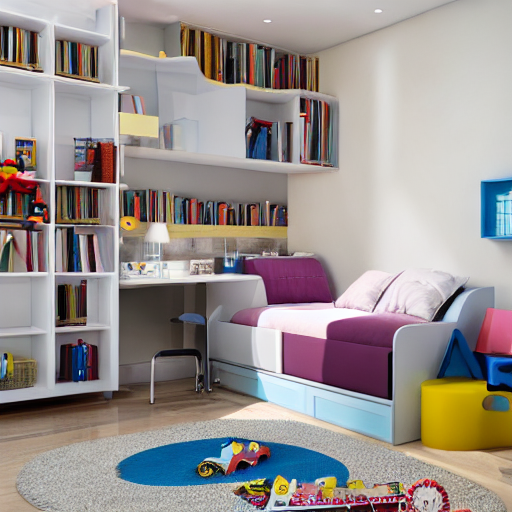

In [25]:
prompt = "Draw picture of a children's bedroom with toys on the floor, books, a study table, and a bed."
agent.chat(prompt, temperature=0.9)

### Use Memory and do Object Detection

Using the result in the previous step, we can use the memory to do more. Here we use the image generated to look for a specific object.

==Explanation from the agent==
I will use the tool `image_segmenter` to detect objects in the image and draw a bounding box around the chair.


==Code generated by the agent==
mask = image_segmenter(image, label="chair")


==Result==


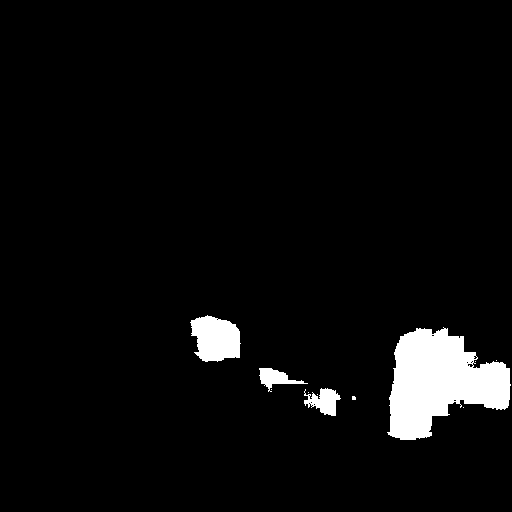

In [26]:
prompt = "Use an object detection model to detect objects in the given picture. " + \
    "Find a chair and place a bounding box around it. "

agent.chat(prompt, temperature=0.9)

### Free-to-use Agents

OpenAI GPT is very good but not free. In this section, we use free-to-use agents call [StarCoder](https://github.com/bigcode-project/starcoder). [OpenAssistant](https://github.com/LAION-AI/Open-Assistant) can also be used but StarCoder's performance is better (quality of output and stability) at the moment.

In [27]:
from transformers import HfAgent

#agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoderbase")

==Explanation from the agent==
I will use the tool `image_transformer` to do that.


==Code generated by the agent==
image = image_transformer(image, prompt="A children's bedroom")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

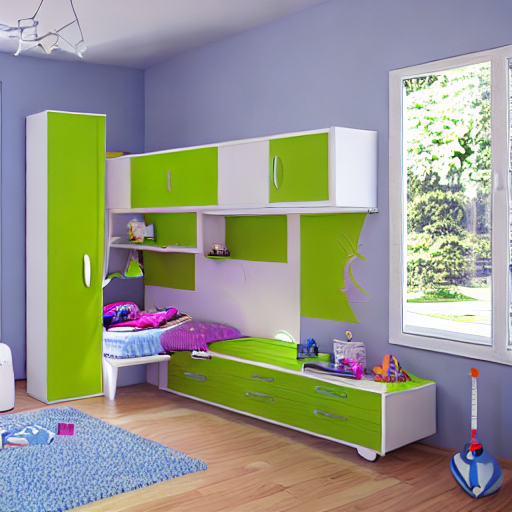

In [31]:
prompt = "Draw me a picture of a children's bedroom with toys on the floor, books, study table, and a bed."
agent.chat(prompt, temperature=0.9)

==Explanation from the agent==
I will use the tool `image_segmenter` to do that.


==Code generated by the agent==
label = "toy"
mask = image_segmenter(image, label)


==Result==


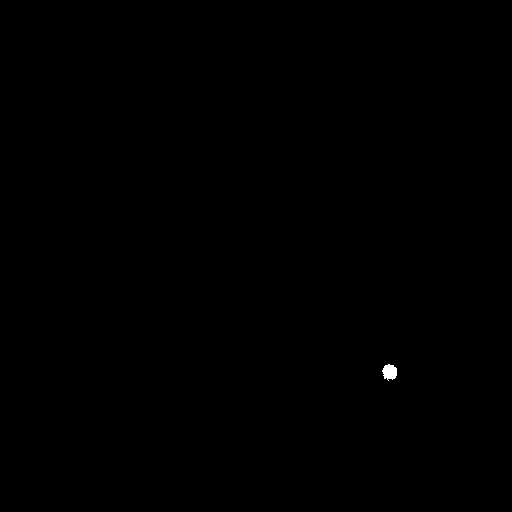

In [32]:
prompt = "Use an object detection model to detect objects in the given picture. " + \
    "Find the toy and place a bounding box around it. "

agent.chat(prompt, temperature=0.9)